Some introductory paragraph should come here.

In [162]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [16]:
def distance(instance1, instance2):
    instance1, instance2 = np.array(instance1), np.array(instance2)
    return np.sqrt(sum((instance1 - instance2)**2))

In [40]:
dataset = [[2.7810836,2.550537003],
           [1.465489372,2.362125076],
           [3.396561688,4.400293529],
           [1.38807019,1.850220317],
           [3.06407232,3.005305973],
           [7.627531214,2.759262235],
           [5.332441248,2.088626775],
           [6.922596716,1.77106367],
           [8.675418651,-0.242068655],
           [7.673756466,3.508563011]]
label = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [69]:
def get_neighbors(training_set, test_instance, k):
    distances = [(i, distance(test_instance, instance)) for i, instance in enumerate(training_set)]
    distances.sort(key=lambda x: x[1])
    return [i[0] for i in distances[:k]]

In [82]:
get_neighbors(dataset, dataset[0], k=7)

[0, 4, 1, 3, 2, 6, 7]

In [96]:
def make_prediction(neighbor_index, label):
    label = np.array(label)
    neighbor_label = label[neighbor_index]
    prediction = {}
    for x in neighbor_label:
        if x in prediction:
            prediction[x] += 1
        else:
            prediction[x] = 1
    total = sum(prediction.values())
    probability_prediction = {k: v/total for k, v in prediction.items()}
    return probability_prediction

In [97]:
make_prediction([0, 4, 1, 3, 2, 6, 7], label)

{0: 0.7142857142857143, 1: 0.2857142857142857}

In [167]:
def knn_classifier(training_set, label, test_set, k):
    result = []
    for instance in test_set:
        neighbor_index = get_neighbors(training_set, instance, k)
        prediction = make_prediction(neighbor_index, label)
        result.append(max(prediction, key=prediction.get))
    return np.array(result)

In [168]:
knn_classifier(dataset, label, [dataset[6]], 3)

array([1])

In [141]:
def my_train_test_split(X, y, test_size, random_state):
    data_num = len(y)
    test_num = int(test_size * data_num)
    np.random.seed(random_state)
    index = np.random.permutation(data_num)
    X_train = X[index[:-test_num]]
    X_test = X[index[-test_num:]]
    y_train = y[index[:-test_num]]
    y_test = y[index[-test_num:]]
    return X_train, X_test, y_train, y_test

In [142]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

In [143]:
X_train, X_test, y_train, y_test = my_train_test_split(iris_data, iris_labels, 0.2, 42)

In [144]:
X_test.shape

(30, 4)

In [147]:
y_pred = knn_classifier(X_train, y_train, X_test, 10)
y_pred

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 2])

In [137]:
y_test

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 2, 0, 1, 2])

In [149]:
def accuracy_score(y_true, y_pred):
    count = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            count += 1
    return count/len(y_true)

In [150]:
accuracy_score(y_pred, y_test)

0.9666666666666667

In [169]:
def tune_parameter(X_train, y_train, X_test, y_test, k_num):
    accuracy = []
    y_test = y_test
    for i in range(1, k_num):
        y_pred = knn_classifier(X_train, y_train, X_test, i)
        accuracy.append(accuracy_score(y_test, y_pred))
    return np.array(accuracy)

In [170]:
accuracy = tune_parameter(X_train, y_train, X_test, y_test, 50)
accuracy

array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.93333333, 0.96666667, 0.93333333,
       0.93333333, 0.9       , 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.9       , 0.93333333, 0.93333333, 0.93333333, 0.9       ,
       0.9       , 0.9       , 0.9       , 0.9       ])

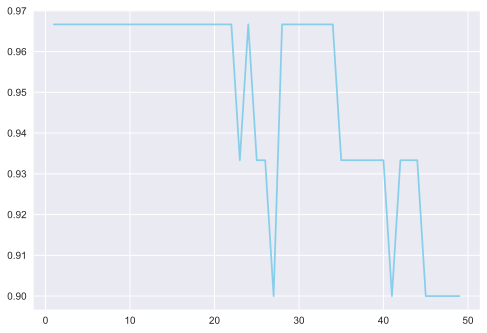

In [166]:
x = np.arange(1, 50)
y = accuracy

plt.plot(x, y, color="skyblue")
plt.show()

...
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/